                            comparison  spearman_r_old  p_value_old  \
0         GPT_t2t_1 vs GPT_m2m_1 (t2t)        0.442871     0.007715   
1         GPT_t2t_1 vs GPT_m2m_2 (t2t)        0.353007     0.037519   
2         GPT_t2t_2 vs GPT_m2m_1 (t2t)        0.448739     0.006854   
3         GPT_t2t_2 vs GPT_m2m_2 (t2t)        0.379832     0.024411   
4         GPT_t2t_1 vs GPT_m2m_1 (m2m)        0.159438     0.375471   
5         GPT_t2t_1 vs GPT_m2m_2 (m2m)        0.182382     0.309696   
6         GPT_t2t_2 vs GPT_m2m_1 (m2m)        0.646056     0.000049   
7         GPT_t2t_2 vs GPT_m2m_2 (m2m)        0.688837     0.000009   
8   Gemini_t2t_1 vs Gemini_m2m_1 (t2t)        0.360732     0.030667   
9   Gemini_t2t_1 vs Gemini_m2m_2 (t2t)        0.355836     0.033177   
10  Gemini_t2t_2 vs Gemini_m2m_1 (t2t)        0.261261     0.123776   
11  Gemini_t2t_2 vs Gemini_m2m_2 (t2t)        0.334106     0.046423   
12  Gemini_t2t_1 vs Gemini_m2m_1 (m2m)        0.240237     0.158150   
13  Ge

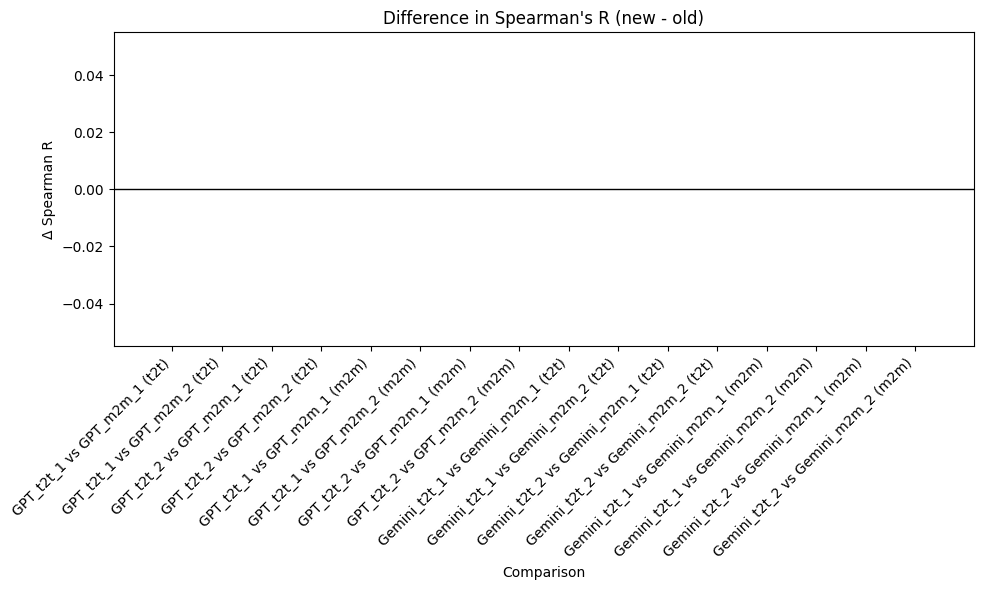

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_spearman_diff(csv_file_old, csv_file_new, output_file="difference_bar.png"):
    """
    Reads two CSV files of Spearman correlations,
    merges by 'comparison', calculates difference in spearman_r, and plots a bar chart.
    
    CSV format (for each file):
        comparison, spearman_r, p_value
    """
    
    # 1. Read the CSVs
    old_df = pd.read_csv(csv_file_old)  # e.g. "spearman_results_old.csv"
    new_df = pd.read_csv(csv_file_new)  # e.g. "spearman_results_new.csv"

    # 2. Merge on "comparison"
    merged_df = pd.merge(old_df, new_df, on="comparison", suffixes=("_old", "_new"))
    print(merged_df)

    # 3. Compute the difference in spearman_r
    merged_df["diff"] = merged_df["spearman_r_new"] - merged_df["spearman_r_old"]

    # 4. Create a bar chart of the difference
    fig, ax = plt.subplots(figsize=(10, 6))

    # Color bars green if diff > 0, otherwise red
    bar_colors = merged_df["diff"].apply(lambda x: "green" if x > 0 else "red")

    ax.bar(
        merged_df["comparison"],
        merged_df["diff"],
        color=bar_colors
    )

    # Draw a horizontal line at 0 to show baseline
    ax.axhline(y=0, color="black", linewidth=1)

    ax.set_title("Difference in Spearman's R (new - old)")
    ax.set_xlabel("Comparison")
    ax.set_ylabel("Δ Spearman R")

    # Rotate x-axis labels so they're readable
    plt.xticks(rotation=45, ha="right")

    plt.tight_layout()
    plt.savefig(output_file)
    plt.show()

# Example usage:
plot_spearman_diff("/Users/I551659/Desktop/spearman_results.csv", "/Users/I551659/Desktop/spearman_results_new.csv", "difference_bar_chart.png")
